<a href="https://colab.research.google.com/github/Korban-HTS3Bulan/Cats-vs-dogs-ML/blob/main/Cats_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np

In [ ]:
UKURAN_GAMBAR = 150
UKURAN_BATCH = 32

# --- FUNGSI FORMAT GAMBAR (sudah benar) ---
def format_gambar(gambar, label):
  gambar = tf.image.resize(gambar, (UKURAN_GAMBAR, UKURAN_GAMBAR))
  gambar = gambar / 255.0
  return gambar, label

# --- MEMUAT, MEMBAGI, DAN MEMPERSIAPKAN DATA ---
(data_latih, data_validasi, data_tes), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

# Terapkan 'resep' format ke setiap set data
data_latih = data_latih.map(format_gambar)
data_validasi = data_validasi.map(format_gambar)
data_tes = data_tes.map(format_gambar)

# KELOMPOKKAN DATA KE DALAM BATCH (INI BAGIAN BARUNYA!)
data_latih = data_latih.batch(UKURAN_BATCH)
data_validasi = data_validasi.batch(UKURAN_BATCH)
data_tes = data_tes.batch(UKURAN_BATCH)

Data berhasil diformat dan dikelompokkan ke dalam batch!


In [ ]:
model = tf.keras.models.Sequential([
    # Lapisan 1: Pasangan 'Mata' dan 'Penyaring' pertama
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Lapisan 2: Pasangan 'Mata' dan 'Penyaring' kedua
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Lapisan 3: Pasangan 'Mata' dan 'Penyaring' ketiga
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Lapisan 'Perata': Mengubah data dari bentuk peta menjadi satu baris panjang
    tf.keras.layers.Flatten(),

    # Lapisan 'Otak' utama untuk analisis
    tf.keras.layers.Dense(512, activation='relu'),

    # Lapisan 'Hakim' atau Output
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# print("Arsitektur model AI berhasil dibangun!")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Perintah ini akan mencetak ringkasan arsitektur model kita
model.summary()

print("Model berhasil dikompilasi dan siap untuk dilatih!")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

Model berhasil dikompilasi dan siap untuk dilatih!


In [ ]:
# Tentukan berapa kali model akan 'membaca' seluruh dataset latihan
JUMLAH_EPOCH = 10

# Mulai proses training!
# Kita simpan hasilnya ke dalam variabel 'history' untuk dianalisis nanti
history = model.fit(
      data_latih,
      epochs=JUMLAH_EPOCH,
      validation_data=data_validasi)

# print("🎉 SELAMAT! TRAINING TELAH SELESAI! 🎉")

Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 1113s 2s/step - accuracy: 0.5784 - loss: 0.6892 - val_accuracy: 0.7218 - val_loss: 0.5422
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 1172s 2s/step - accuracy: 0.7561 - loss: 0.5015 - val_accuracy: 0.7941 - val_loss: 0.4437
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 1112s 2s/step - accuracy: 0.8189 - loss: 0.3971 - val_accuracy: 0.7941 - val_loss: 0.4479
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 1075s 2s/step - accuracy: 0.8786 - loss: 0.2838 - val_accuracy: 0.7605 - val_loss: 0.5710
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 1084s 2s/step - accuracy: 0.9273 - loss: 0.1806 - val_accuracy: 0.7803 - val_loss: 0.6428
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 1107s 2s/step - accuracy: 0.9500 - loss: 0.1306 - val_accuracy: 0.7837 - val_loss: 0.7735
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 1072s 2s/step - accuracy: 0.9704 - loss: 0.0817 - val_accuracy: 0.7696 - val_loss: 0.9836
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 1082s 2s/step - accuracy: 0.9794 - loss: 0.0578 - 

73/73 ━━━━━━━━━━━━━━━━━━━━ 55s 741ms/step - accuracy: 0.7606 - loss: 1.5777

Akurasi pada data tes (ujian akhir): 77.13%


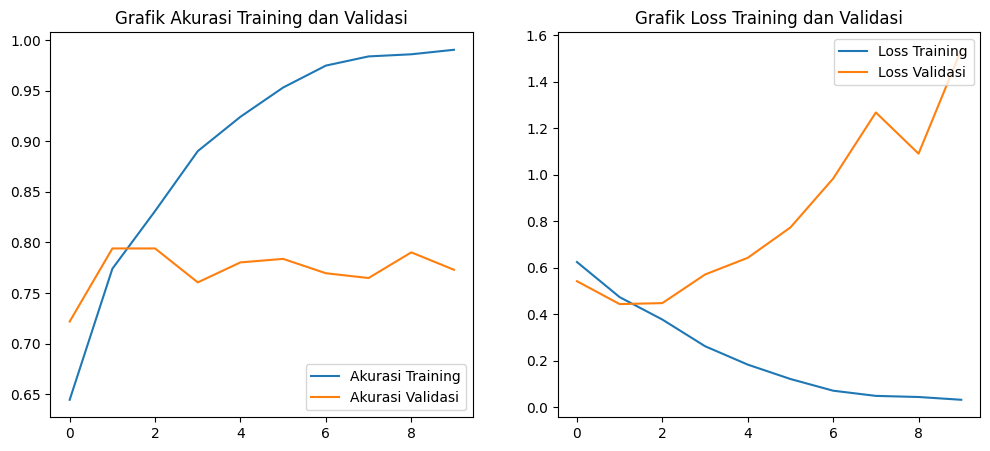

In [ ]:
import matplotlib.pyplot as plt

# 1. Evaluasi model dengan data tes (data ujian akhir)
loss, accuracy = model.evaluate(data_tes)
print(f"\nAkurasi pada data tes (ujian akhir): {accuracy * 100:.2f}%")

# 2. Membuat plot dari 'history' belajar model yang sudah kita simpan
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(JUMLAH_EPOCH)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Akurasi Training')
plt.plot(epochs_range, val_acc, label='Akurasi Validasi')
plt.legend(loc='lower right')
plt.title('Grafik Akurasi Training dan Validasi')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Loss Training')
plt.plot(epochs_range, val_loss, label='Loss Validasi')
plt.legend(loc='upper right')
plt.title('Grafik Loss Training dan Validasi')
plt.show()